In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('election2024.csv')
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [4]:
df.columns

Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type', 'weight1'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [6]:
df.describe()

,age,weight1
count,1600.000000,1600.000000
mean,49.936250,1.000000
std,16.901797,0.327084
min,18.000000,0.468226
25%,37.000000,0.772224
50%,49.000000,0.921724
75%,64.000000,1.158913
max,90.000000,2.515072


In [7]:
df.isna().sum()

id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64

In [8]:
df.drop(['job_type', 'id', 'company_type'], axis=1, inplace=True)
df.columns

Index(['sex', 'age', 'federal_district', 'type_of_city', 'knows_election_date',
       'will_vote', 'candidate', 'television_usage', 'internet_usage',
       'education', 'income', 'employment', 'weight1'],
      dtype='object')

In [9]:
df.rename(columns={"weight1":"weight"}, inplace=True)

In [10]:
df['age'] = df['age'].astype(int)
df['age']

0       18
1       23
2       20
3       22
4       21
        ..
1595    61
1596    80
1597    76
1598    74
1599    76
Name: age, Length: 1600, dtype: int64

In [11]:
for col in df.columns:
    print(f"{col} : {df[col].dtype}")

sex : object
age : int64
federal_district : object
type_of_city : object
knows_election_date : object
will_vote : object
candidate : object
television_usage : object
internet_usage : object
education : object
income : object
employment : object
weight : float64


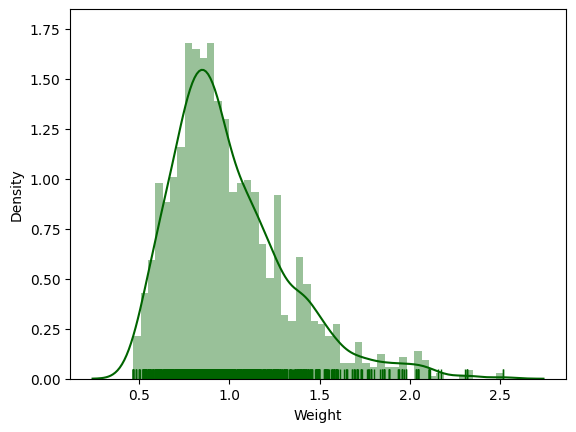

In [12]:
sns.distplot(df['weight'], bins=50, color='darkgreen', rug=True)
plt.xlabel("Weight")
plt.show()

<Figure size 1200x1200 with 0 Axes>

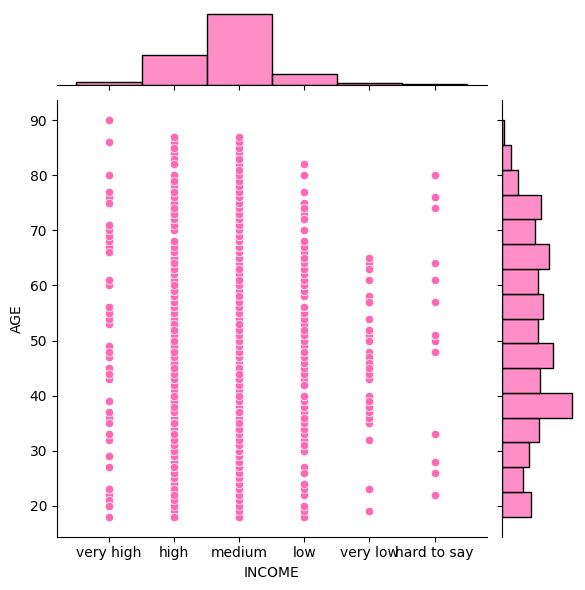

In [13]:
plt.figure(figsize=(12,12))
sns.jointplot(x='income', y='age', data=df, color='hotpink')
plt.xlabel('INCOME')
plt.ylabel('AGE')
plt.show()

<Figure size 1900x1900 with 0 Axes>

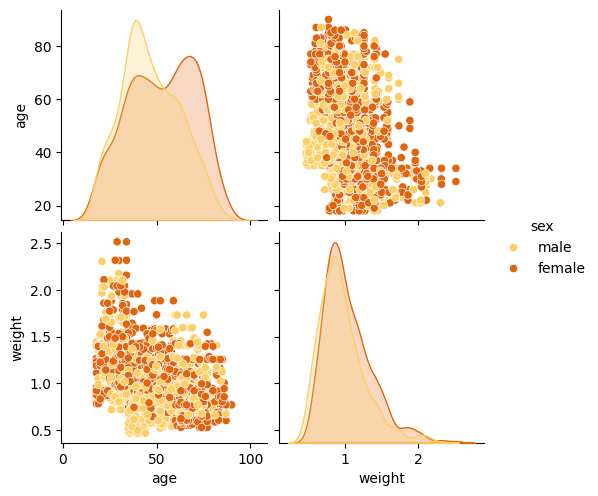

In [14]:
plt.figure(figsize=(19,19))
sns.pairplot(data=df, hue='sex', palette='YlOrBr')
plt.show()

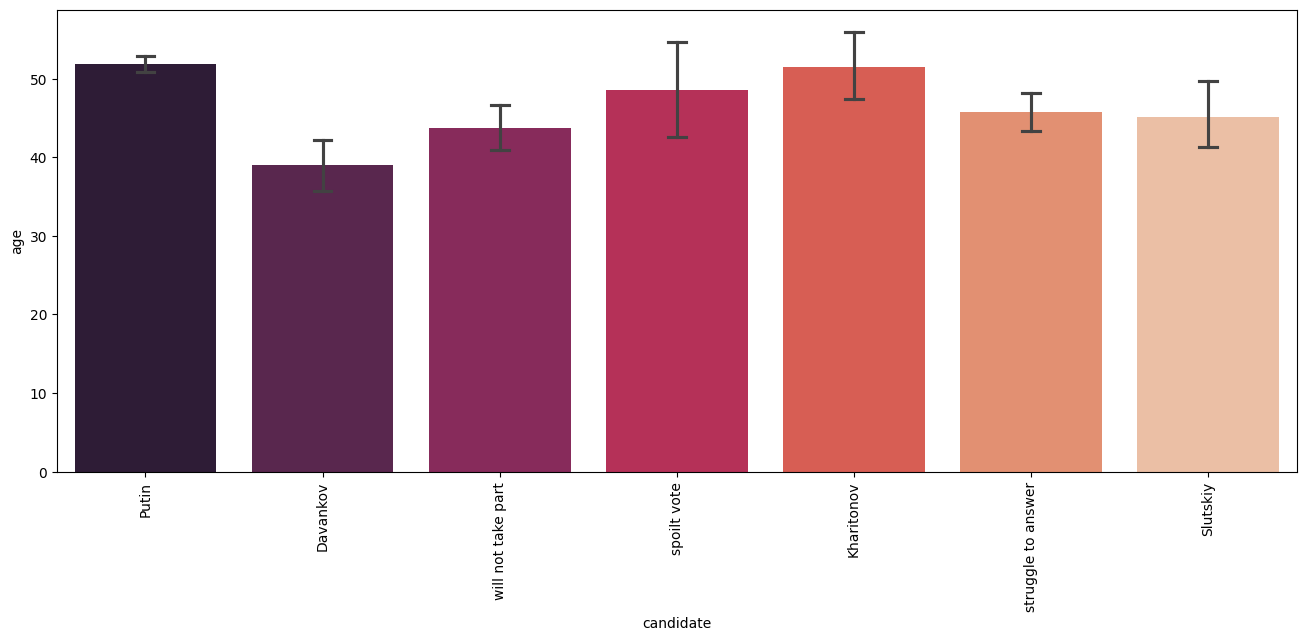

In [15]:
plt.figure(figsize=(16,6))
sns.barplot(x='candidate', y='age', data=df, palette='rocket', capsize=0.1)
plt.xticks(rotation=90)
plt.show()

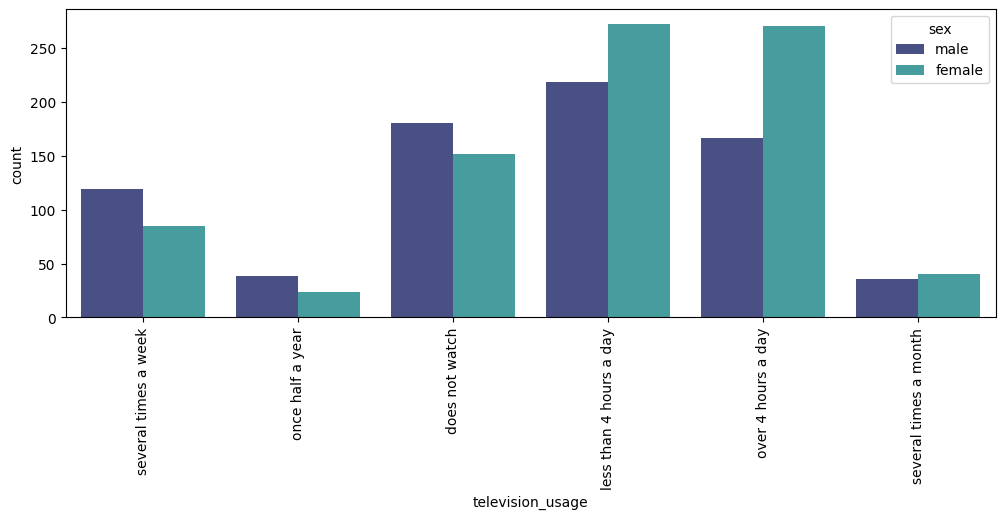

In [16]:
plt.figure(figsize=(12,4))
sns.countplot(x='television_usage',data=df, hue='sex', palette='mako')
plt.xticks(rotation=90)
plt.show()

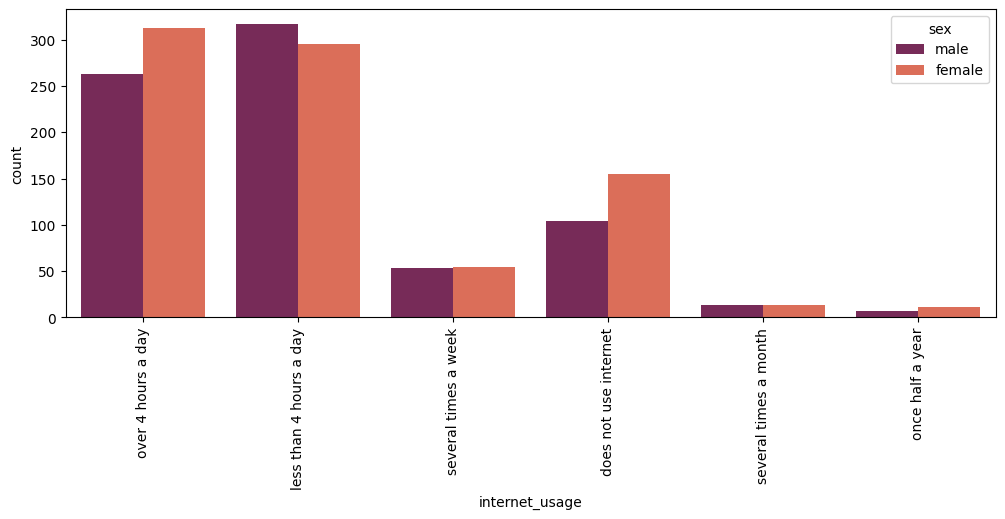

In [17]:
plt.figure(figsize=(12,4))
sns.countplot(x='internet_usage',data=df, hue='sex', palette='rocket')
plt.xticks(rotation=90)
plt.show()

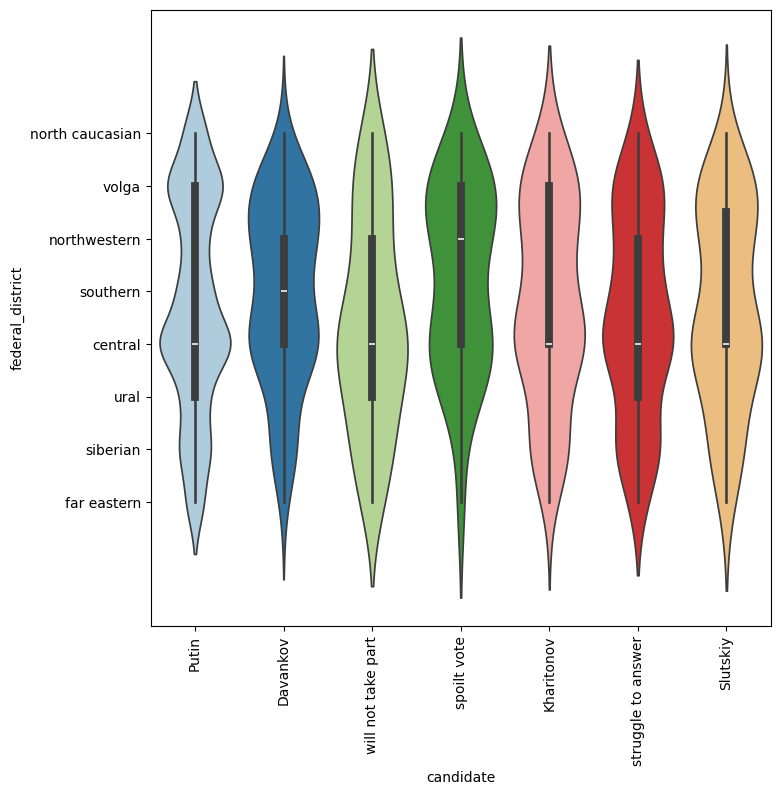

In [18]:
plt.figure(figsize=(8,8))
sns.violinplot(data=df, x='candidate', y='federal_district', palette='Paired')
plt.xticks(rotation=90)
plt.show()

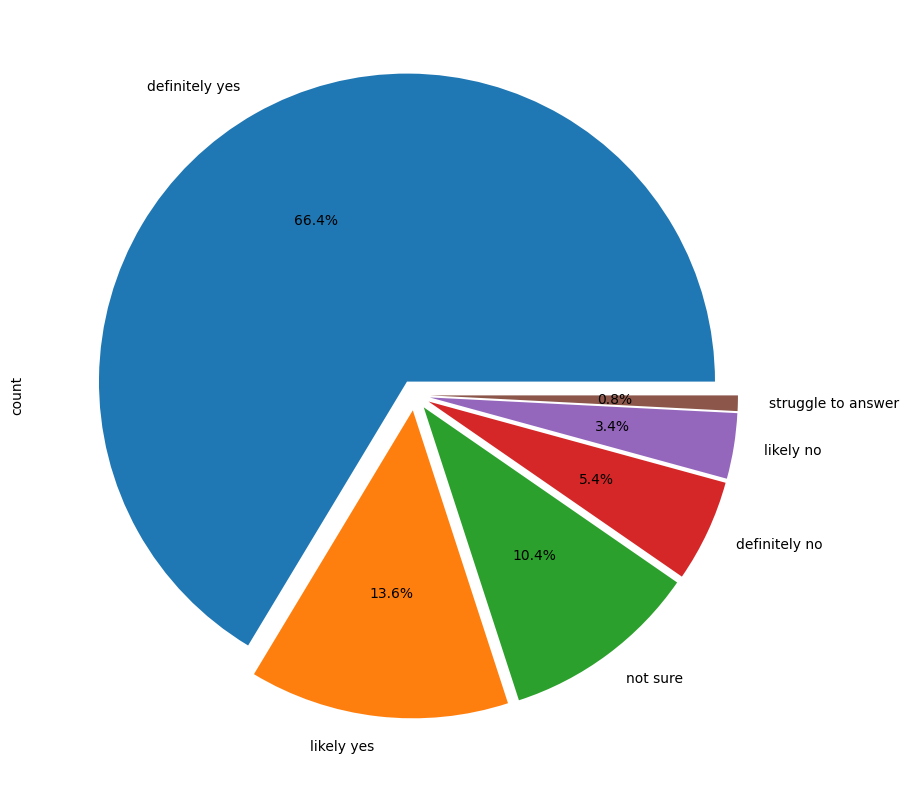

In [19]:
df['will_vote'].value_counts().plot.pie(y=df['will_vote'], autopct='%1.1f%%', figsize=(10,10), explode=[0.05]*6)
plt.show()

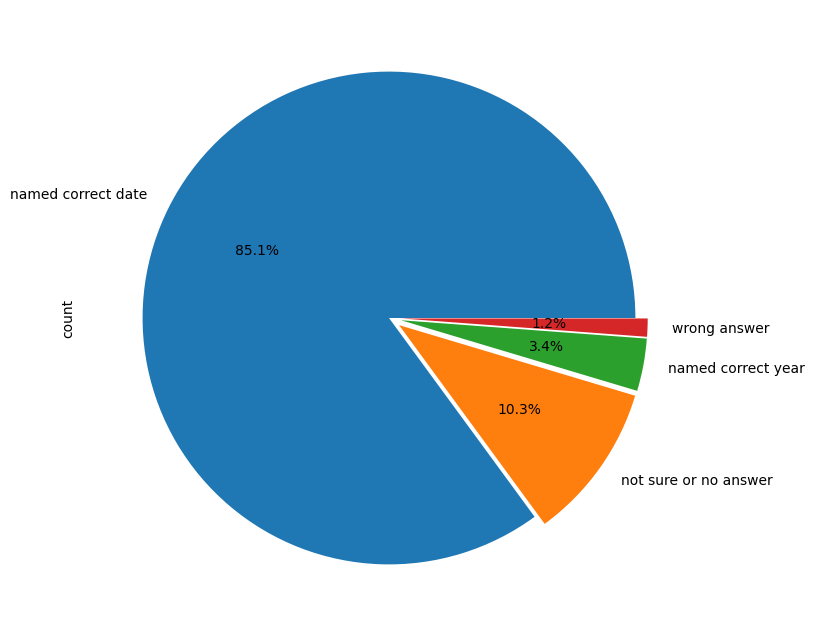

In [20]:
df['knows_election_date'].value_counts().plot.pie(y=df['knows_election_date'], autopct='%1.1f%%', figsize=(8,8), explode=[0.0,0.05,0.05,0.05])
plt.show()

In [21]:
df.columns

Index(['sex', 'age', 'federal_district', 'type_of_city', 'knows_election_date',
       'will_vote', 'candidate', 'television_usage', 'internet_usage',
       'education', 'income', 'employment', 'weight'],
      dtype='object')

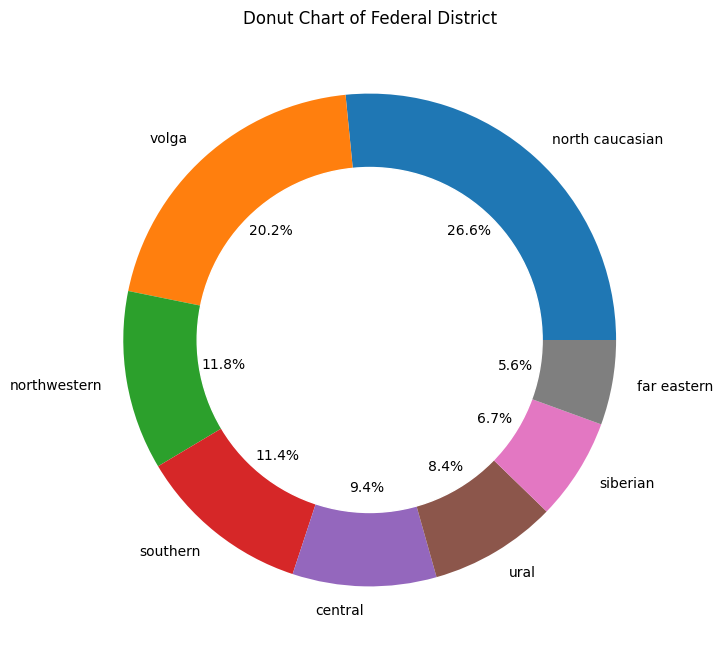

In [38]:
plt.figure(figsize=(8,8))
plt.pie(x=df['federal_district'].value_counts(), autopct='%1.1f%%', labels=df['federal_district'].unique())
circle = plt.Circle((0,0), 0.7, color='white')
plt.gca().add_artist(circle)
plt.title('Donut Chart of Federal District')
plt.show()

In [24]:
selected_columns = ['federal_district', 'type_of_city', 'will_vote', 'candidate', 'television_usage', 'internet_usage', 'education','employment']

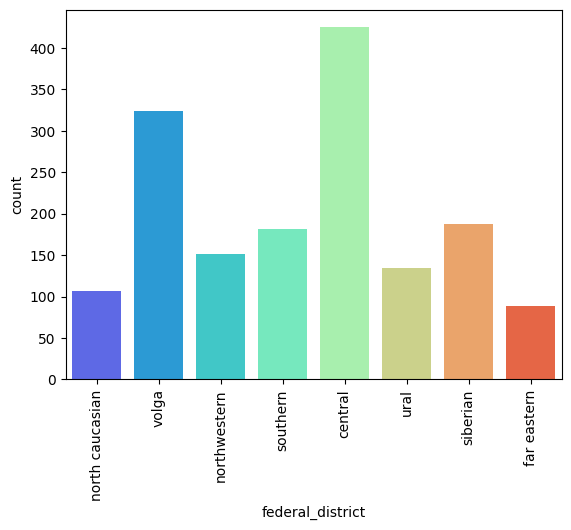

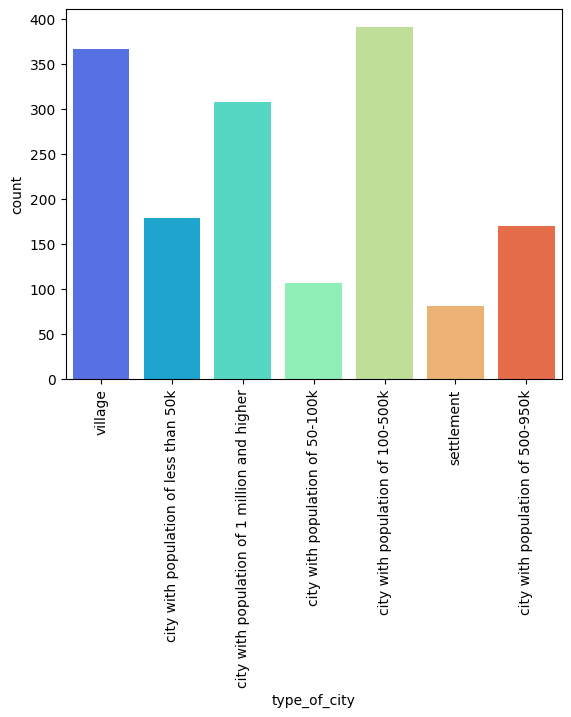

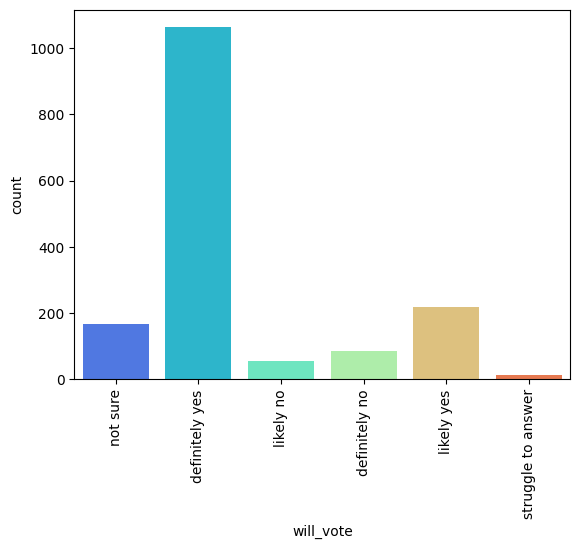

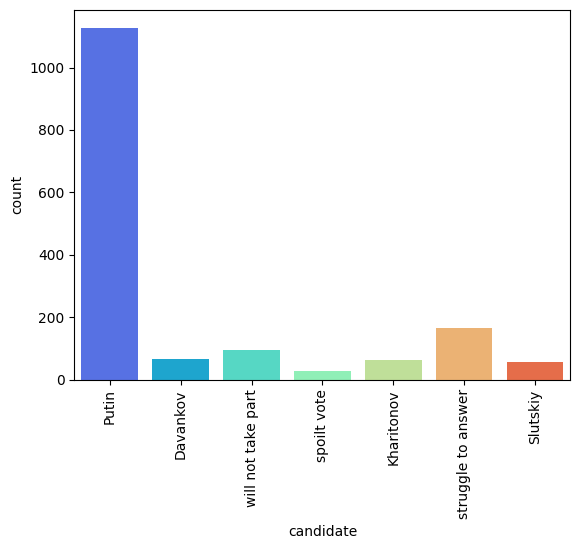

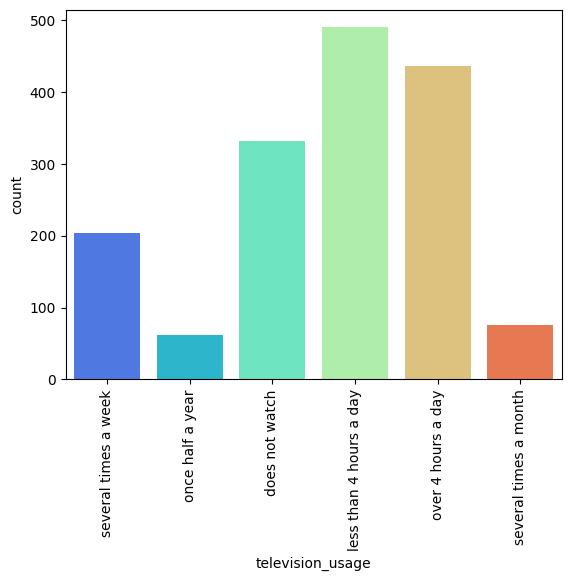

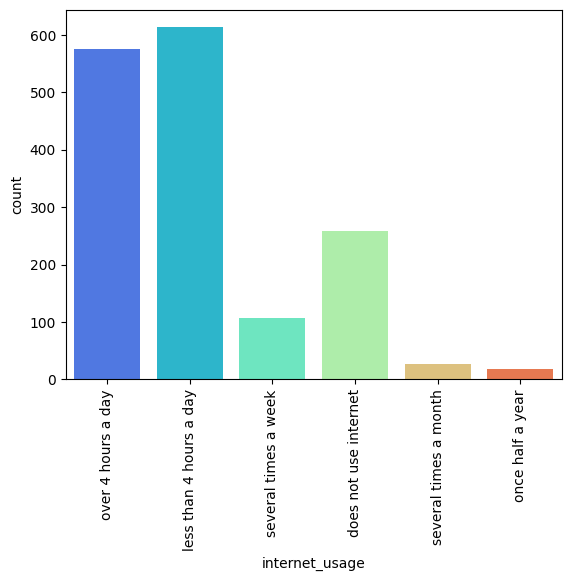

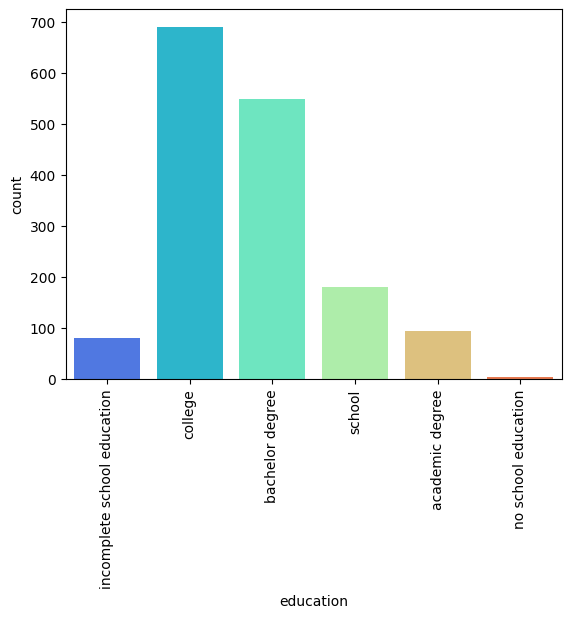

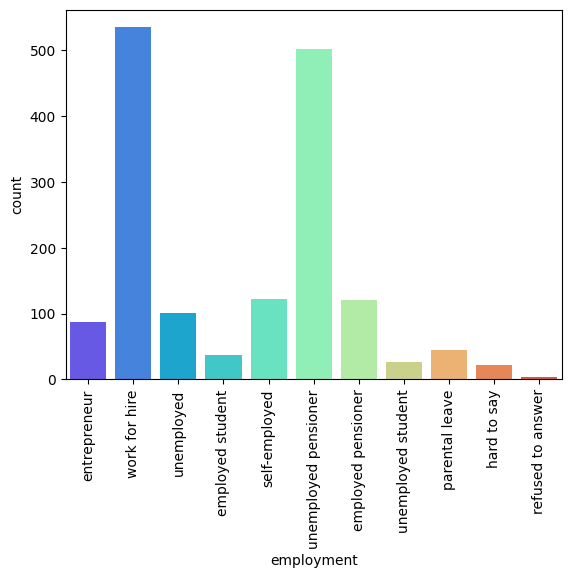

In [31]:
for col in selected_columns:
    sns.countplot(x=df[col], data=df, palette='rainbow')
    plt.xticks(rotation=90)
    plt.show()